In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# 2. Load the Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
# Map target numbers to species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(species_map)

In [4]:
# 3. Split into Features and Target
X = df.drop('species', axis=1)
y = df['species']

In [5]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 5. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# 6. Train the KNN Model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# 7. Make Predictions
y_pred = model.predict(X_test)

In [9]:
# 8. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



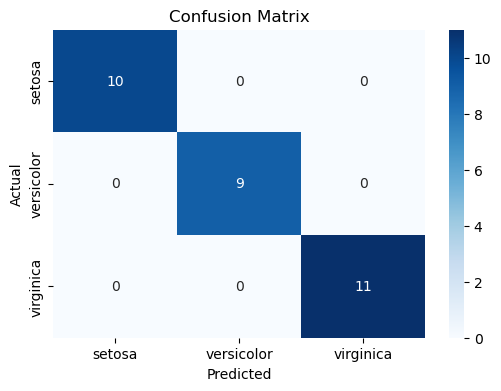

In [10]:
# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

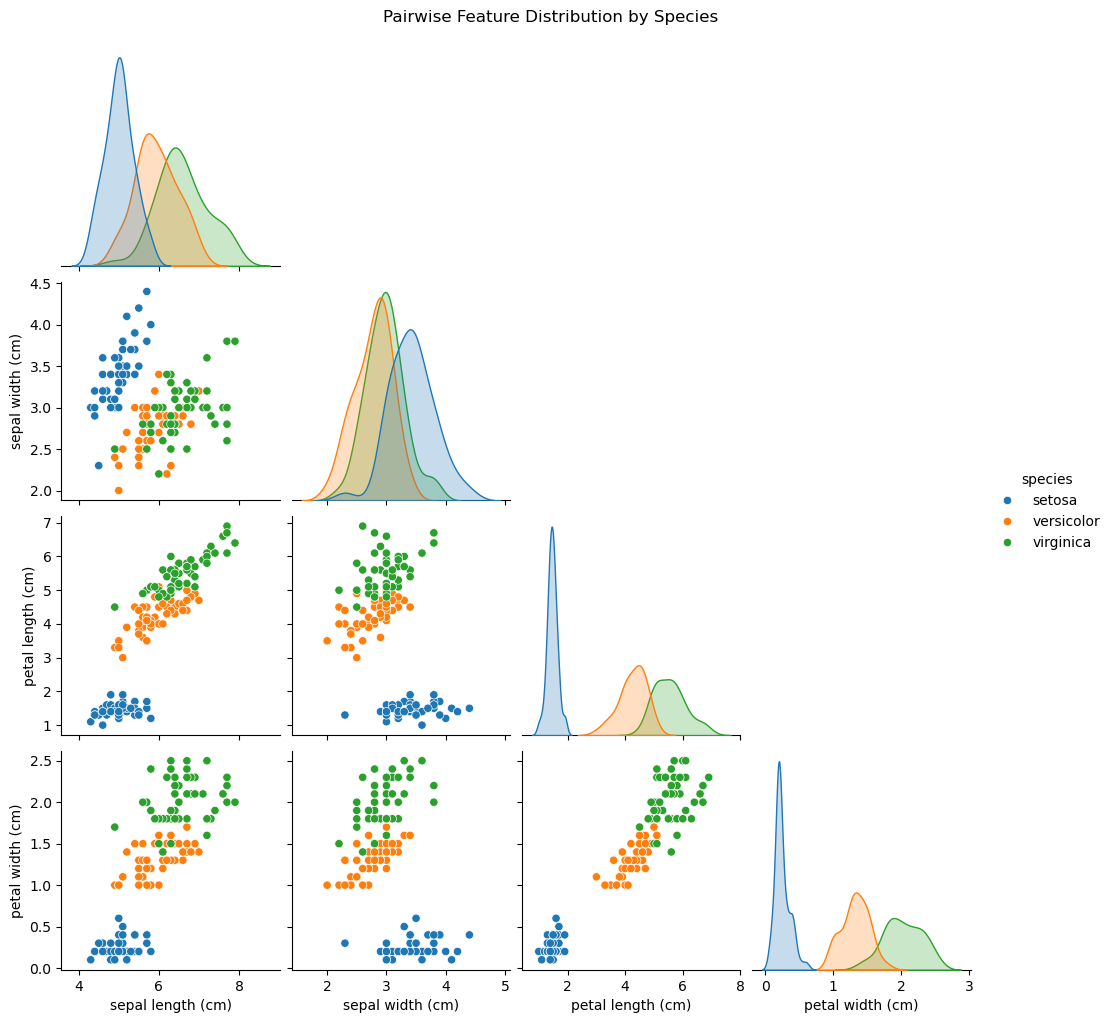

In [11]:
sns.pairplot(df, hue='species', corner=True)
plt.suptitle("Pairwise Feature Distribution by Species", y=1.02)
plt.show()


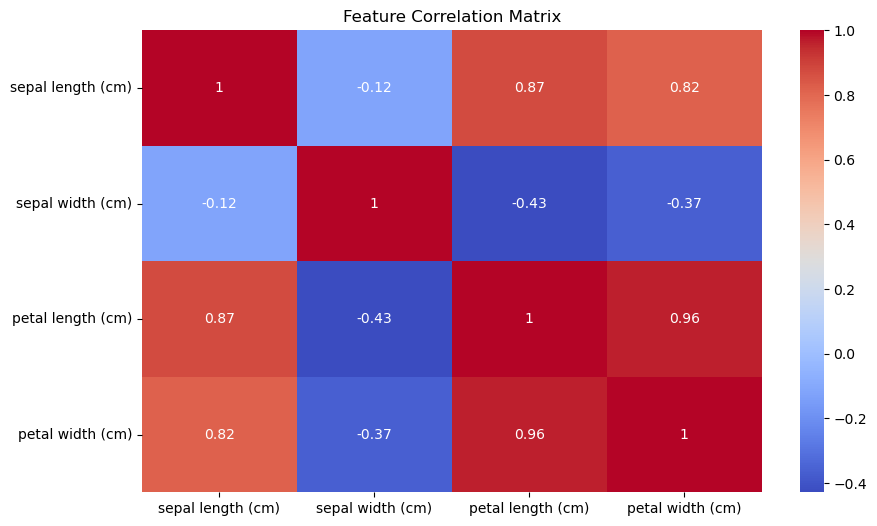

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


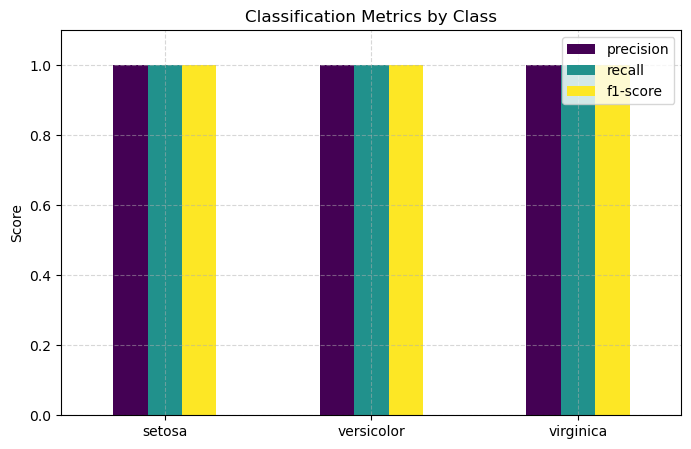

In [13]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Convert classification report to dict
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:3, :3]  # Only classes, only precision/recall/f1

report_df.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


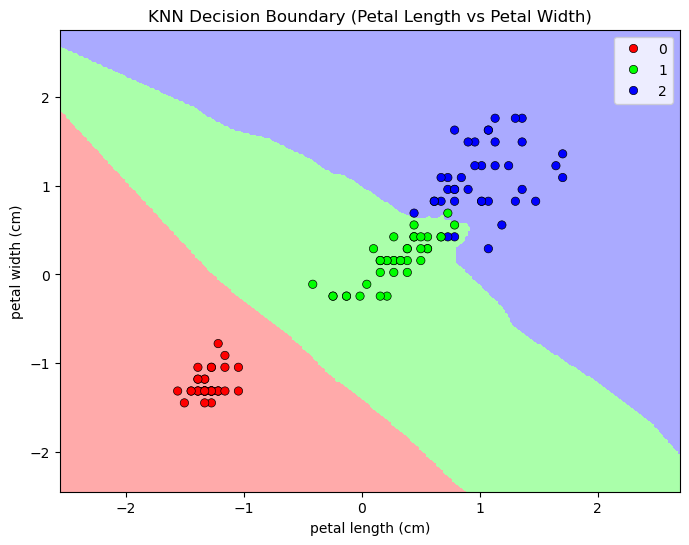

In [15]:
# Use only two features for visualization (gpt)
feature1 = 'petal length (cm)'
feature2 = 'petal width (cm)'

X_vis = df[[feature1, feature2]].values
y_vis = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values

# Split & scale
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
scaler_v = StandardScaler()
X_train_v = scaler_v.fit_transform(X_train_v)
X_test_v = scaler_v.transform(X_test_v)

# Train KNN
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_v, y_train_v)

# Plot decision boundary
from matplotlib.colors import ListedColormap

h = .02
x_min, x_max = X_train_v[:, 0].min() - 1, X_train_v[:, 0].max() + 1
y_min, y_max = X_train_v[:, 1].min() - 1, X_train_v[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X_train_v[:, 0], y=X_train_v[:, 1], hue=y_train_v,
                palette=cmap_bold, alpha=1.0, edgecolor="k")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("KNN Decision Boundary (Petal Length vs Petal Width)")
plt.show()
